In [1]:
import glob
from tools.compress import load

data = []

for file in glob.glob("./results-svm*.json"):
    print(file)
    try:
        d = load(file)
    except Exception:
        continue
    for experiment in d:
        if not len(experiment["probas"]):
            continue
        data.append({
            "mean": sum(experiment["probas"])/len(experiment["probas"]),
            "exp": len(experiment["probas"]),
            "gap": experiment["gap"],
            "year": experiment["date"],
            "author": experiment["author"].title()
        })


./results-svm-ens1-G5.json
./results-svm-ens1-G-1.json
./results-svm-ens1-Grandom.json
./results-svm-ens1-G-10.json
./results-svm-ens1-G-15.json
./results-svm-ens1-G10.json
./results-svm-ens1-G15.json
./results-svm-ens1-G1.json
./results-svm-ens1-G-5.json


In [2]:
import pandas as pd

df = pd.DataFrame(data)
df = df.sort_values(["gap", "author"])
df

,mean,exp,gap,year,author
550,0.828796,103,-15,1844,Balzac
552,0.877794,68,-15,1846,Balzac
553,0.885050,120,-15,1847,Balzac
554,0.978345,29,-15,1848,Balzac
555,0.658500,32,-15,1854,Dumas
...,...,...,...,...,...
316,0.875250,60,random,1891,Zola
345,0.642959,49,random,1871,Zola
368,0.834292,48,random,1875,Zola
369,0.852453,53,random,1876,Zola


In [3]:
df[df.duplicated(["year", "gap", "author"], False)].sort_values(["gap", "year"])

,mean,exp,gap,year,author


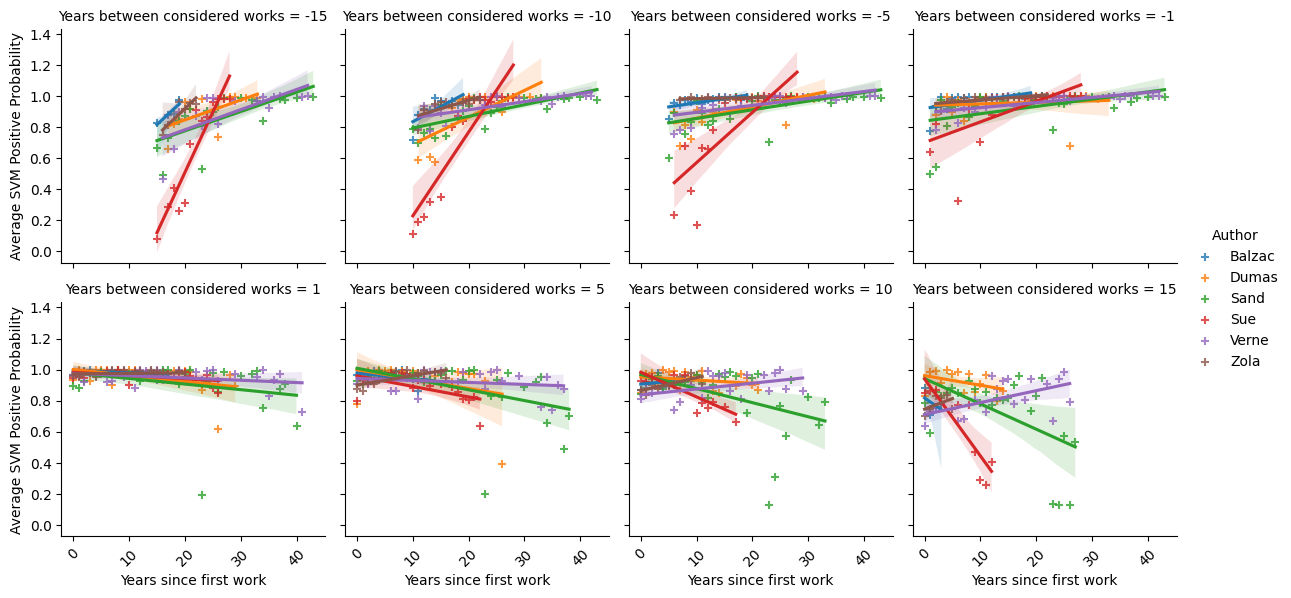

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df is your DataFrame
df["relative_year"] = df.groupby("author")["year"].transform(lambda x: x - x.min())
df.columns = ['Accuracy', 'Query Size', 'Gap', 'Date', 'Author', 'Year (Relative to start of career)']

# Create a FacetGrid with one facet per 'gap' value
g = sns.FacetGrid(df[df.Gap != "random"], col="Gap", hue="Author", sharey=True, sharex=True, col_wrap=4)

# Map a lineplot to each facet
g.map(sns.regplot, "Year (Relative to start of career)", "Accuracy", marker="+")

# Add a legend
g.add_legend()

# Rotate x-axis labels for better readability (optional)
for ax in g.axes.flat:
    ax.set_xlabel("Years since first work")
    ax.set_ylabel("Average SVM Positive Probability")
    for label in ax.get_xticklabels():
        label.set_rotation(45)

g.set_titles(col_template="Years between considered works = {col_name}")

# Adjust layout
# g.tight_layout()

plt.savefig("normalized_plot_svm.png", dpi=300, bbox_inches='tight')
plt.show()


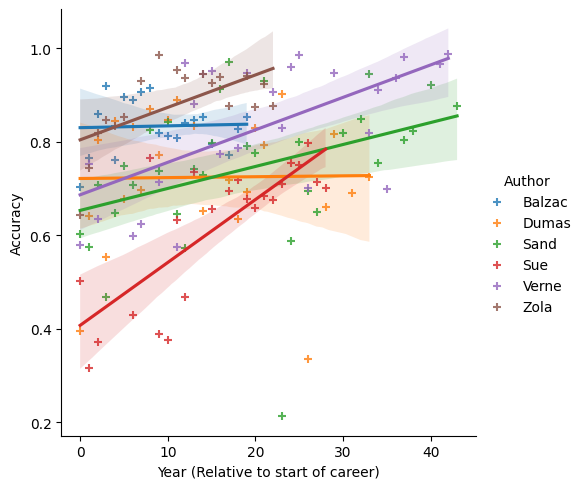

<Axes: xlabel='Author', ylabel='Accuracy'>

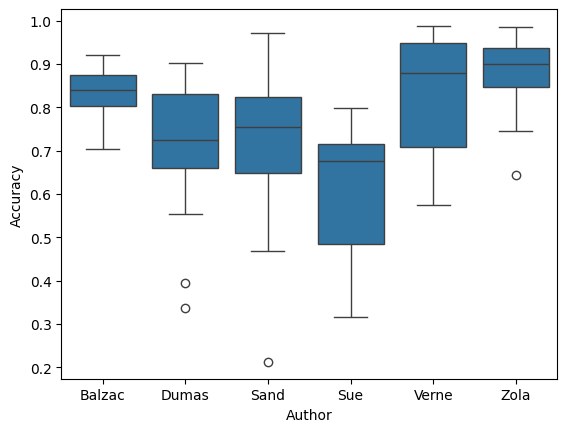

In [15]:
sns.lmplot(data=df[df.Gap=="random"], x="Year (Relative to start of career)", y="Accuracy", hue="Author", markers="+")

plt.savefig("normalized_svm_control.png", dpi=300, bbox_inches='tight')
plt.show()

sns.boxplot(data=df[df.Gap=="random"], y="Accuracy", x="Author")